--------------------------
## cosine similarity
------------------------


In [1]:
import numpy as np
import pandas as pd

from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import re

from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# import plotting libraries
from mpl_toolkits.mplot3d.axes3d import Axes3D

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.preprocessing import normalize

#### what is Cosine Similarity

- Intuitively, let’s say we have 2 vectors, each representing a sentence. If the vectors are close to parallel, maybe we assume that both sentences are “similar” in theme. Whereas if the vectors are orthogonal, then we assume the sentences are independent or NOT “similar”. 

$$ \mbox{Cosine Similarity} = \frac{\sum_{i=1}^{n}{x_{i} y_{i}}}
           {\sqrt{\sum_{i=1}^{n}{x_{i}^{2}}}
            \sqrt{\sum_{i=1}^{n}{y_{i}^{2}}}}$$
            
$$ \mbox{Cosine Distance} = 1 - \mbox{Cosine Similarity} $$ 

The resulting similarity ranges from 

- −1 meaning exactly opposite, 
-  1 meaning exactly the same, 
-  0 indicating orthogonality or decorrelation, 
- while in-between values indicate intermediate similarity or dissimilarity.

#### Applications
- In practice, cosine similarity tends to be useful when trying to determine how similar two texts/documents are. 

- used for sentiment analysis, translation, for detecting plagiarism. 

- Cosine similarity works in these usecases because we ignore magnitude and focus solely on orientation. when the magnitude of the vectors does not matter. 

- In NLP, this might help us still detect that a much longer document has the same “theme” as a much shorter document since we don’t worry about the magnitude or the “length” of the documents themselves.

- For __text matching__, the attribute vectors A and B are usually the term frequency vectors of the documents. Cosine similarity can be seen as a method of normalizing document length during comparison.

- In the case of __information retrieval__, the cosine similarity of two documents will range from 0 to 1, since the term frequencies (using tf–idf weights) cannot be negative. The angle between two term frequency vectors cannot be greater than 90°.

In [2]:
# vectors
a = np.array([1,  2,  3])
b = np.array([10, 10, 40])

In [8]:
# method - 1 - using scipy
# Compute the Cosine distance between 1-D arrays.
# so 
# cosine sim = 1 - cosine distance
print('Cosine distance = ', distance.cosine(a, b))

print('cosine sim = ', 1-distance.cosine(a, b))

Cosine distance =  0.05508881747693195
cosine sim =  0.944911182523068


In [9]:
# method - 2 - using numpy
# manually compute cosine similarity
dot = np.dot(a, b)
norma = np.linalg.norm(a)
normb = np.linalg.norm(b)
cos = dot / (norma * normb)

print("Cosine similarity is {}".format(cos))
print("Cosine distance   is {}".format(1-cos))

Cosine similarity is 0.944911182523068
Cosine distance   is 0.05508881747693195


In [10]:
# Method 3
# define own cosine function
def compute_cosine(a, b):
    result_num = np.dot(a, b)
    result_den = np.sqrt(np.sum(a **2)) * np.sqrt(np.sum(b ** 2))
    
    return result_num / result_den

cos = compute_cosine(a, b)

print("Cosine similarity is {}".format(cos))
print("Cosine distance   is {}".format(1-cos))

Cosine similarity is 0.944911182523068
Cosine distance   is 0.05508881747693195


#### When to use the cosine similarity?

In [12]:
X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
df

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


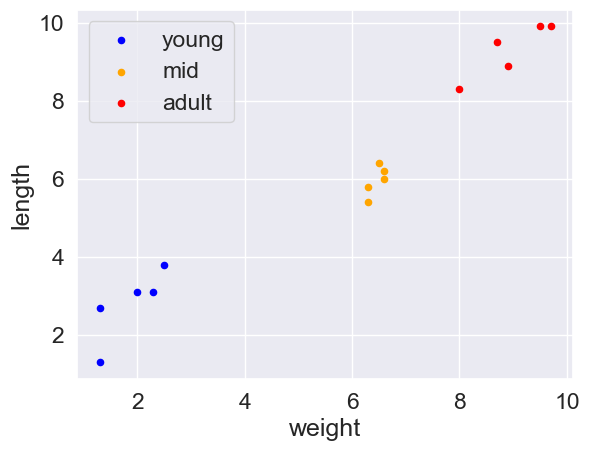

In [13]:
ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue',   label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid',   ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red',    label='adult', ax=ax)

ax;

Looking at the plot above, we can see that the 3 classes are pretty well distinguishable by these 2 features that we have. 

Say that we apply k-NN to our data that will learn to classify new instances based on their distance to our known instances (and their labels). 

The algorithm needs a distance metric to determine which of the known instances are closest to the new one. 

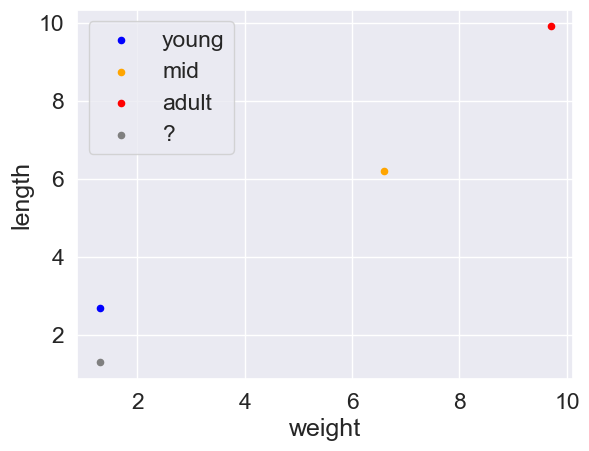

In [14]:
# Considering instance #0, #1, and #4 to be our known instances, we assume that we don’t know 
# the label of #14. 
# Plotting this will look as follows:

df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue',   label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid',   ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red',    label='adult', ax=ax)

ax = df3.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)

#### Euclidean
Our euclidean distance function can be defined as follows:

$$ \Large \sqrt{\sum^n_{i=1} (x_i - y_i)^2} $$

In [15]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

In [16]:
X[1][:-1]

array([9.7, 9.9])

In [17]:
x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]

x14 = X[14][:-1]
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14)

 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3]


In [19]:
print("x14 and x0:", euclidean_distance(x14, x0), "\n",
      "x14 and x1:", euclidean_distance(x14, x1), "\n",
      "x14 and x4:", euclidean_distance(x14, x4))

x14 and x0: 7.218032973047436 
 x14 and x1: 12.021647141718974 
 x14 and x4: 1.4000000000000001


According to euclidean distance, instance #14 is closest to #4. Our 4th instance had the label:

0 = young, which is what we would visually also deem the correct label for this instance.

In [20]:
X[4]

array([1.3, 2.7, 0. ])

#### Cosine
Our cosine similarity function can be defined as follows:

$$ \Large \frac{x \bullet y}{ \sqrt{x \bullet x} \sqrt{y \bullet y}} $$

Where x and y are two vectors

In [21]:
def fn_cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [22]:
print(" x14 and x0:", fn_cosine_similarity(x14, x0), "\n",
      "x14 and x1:",  fn_cosine_similarity(x14, x1), "\n",
      "x14 and x4:",  fn_cosine_similarity(x14, x4))

 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174


According to cosine similarity, instance #14 is closest to #1. However, our 1st instance had the label:

2 = adult, which is definitely NOT correct!

In [28]:
X[1]

array([9.7, 9.9, 2. ])

#### So what is the deal here ??

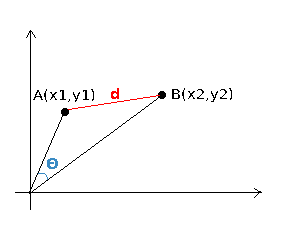

- visual representation of euclidean distance (d) and cosine similarity (θ)
- cosine looks at the angle between vectors (thus not taking into regard their weight or magnitude) 
- euclidean distance is similar to using a ruler to actually measure the distance. 

In our example the angle between x14 and x4 was larger than those of the other vectors, even though they were further away.

In [14]:
print(x0 , x1 , x4 , x14 )

[6.6 6.2] [9.7 9.9] [1.3 2.7] [1.3 1.3]


(0.0, 12.0)

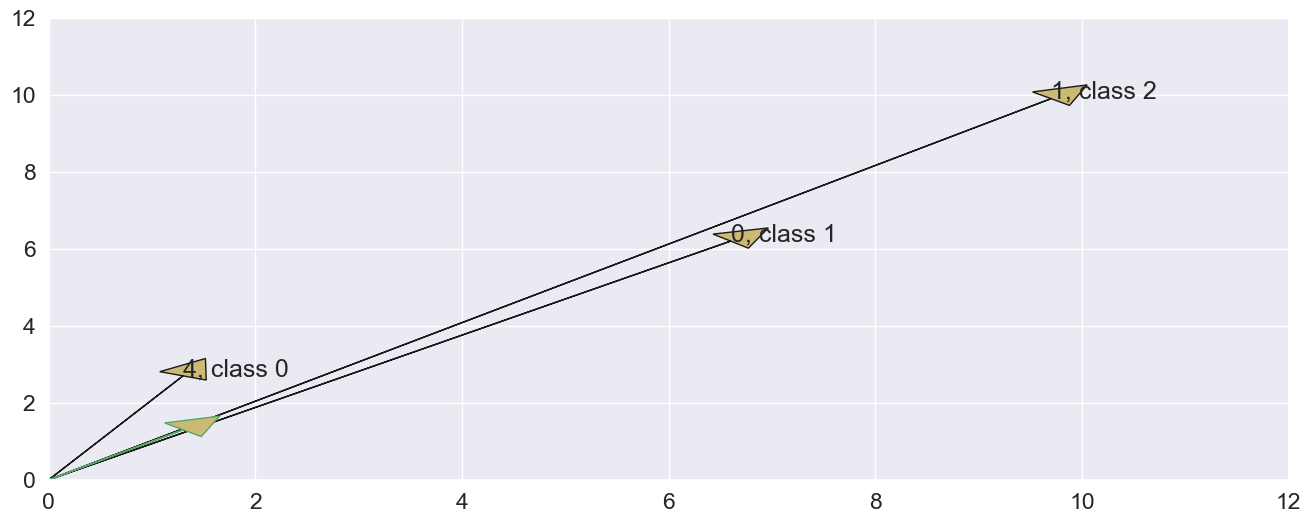

In [23]:
plt.figure(figsize=(16, 6))
plt.arrow(0, 0, x0[0], x0[1], head_width = .5,  head_length= .5, fc='y', ec='k')
plt.annotate('0, class 1 ', xy=(x0[0], x0[1]), xytext=(x0[0],x0[1]))

plt.arrow(0, 0, x1[0], x1[1], head_width = .5,  head_length= .5, fc='y', ec='k')
plt.annotate('1, class 2 ', xy=(x1[0], x1[1]), xytext=(x1[0],x1[1]))

plt.arrow(0, 0, x4[0], x4[1], head_width = .5,  head_length= .5, fc='y', ec='k')
plt.annotate('4, class 0 ', xy=(x4[0], x4[1]), xytext=(x4[0],x4[1]))

plt.arrow(0, 0, x14[0], x14[1], head_width = .5,  head_length= .5, fc='y', ec='g')

plt.xlim(0, 12)
plt.ylim(0, 12)

In [31]:
# the 3 training and 1 test points
df.iloc[[0, 1, 4, 14]]

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
4,1.3,2.7,0.0
14,1.3,1.3,0.0


#### How do Euclidean Distance and Cosine Similarity Relate?

In [17]:
print("vectors \t", x0, x1, "\n"
      "euclidean \t", euclidean_distance(x0, x1), "\n"
      "cosine \t\t" , fn_cosine_similarity(x0, x1))

vectors 	 [6.6 6.2] [9.7 9.9] 
euclidean 	 4.827007354458868 
cosine 		 0.9991413385403556


Cosine similarity takes a unit length vector to calculate dot products. However, what happens if we do the same for the vectors we’re calculating the euclidian distance for (i.e. normalize them)?

we will do the same for the vectors we’re calculating the euclidian distance for (i.e. normalize them)

$$ L_1 = \sum_i x_i $$

or the $ L_2 $ norm

$$ L_2 = \sqrt{\sum_i x_i^2 } $$

In [21]:
def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

def l2_normalize(v):
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

We will divide the values of our vector by these norms to get a normalized vector.

Applying the L1 norm to our vectors will make them sum up to 1 respectively, as such:

In [22]:
x0_n = l1_normalize(x0)
x1_n = l1_normalize(x1)
print(x0_n, x1_n)

[0.515625 0.484375] [0.49489796 0.50510204]


In [23]:
print("vectors \t", x0_n, x1_n, "\n"
      "euclidean \t", euclidean_distance(x0_n, x1_n), "\n"
      "cosine \t\t", fn_cosine_similarity(x0_n, x1_n))

vectors 	 [0.515625 0.484375] [0.49489796 0.50510204] 
euclidean 	 0.029312462230309616 
cosine 		 0.9991413385403558


before, the distance was pretty big, but the cosine similarity very high. Now that we normalized our vectors, it turns out that the distance is now very small

let us try vector 4, Unnormalized:


In [24]:
print("vectors \t", x0, x4, "\n"
      "euclidean \t", euclidean_distance(x0, x4), "\n"
      "cosine \t\t", fn_cosine_similarity(x0, x4))

# Normalized:

x4_n = l1_normalize(x4)

print("vectors \t", x0_n, x4_n, "\n"
      "euclidean \t", euclidean_distance(x0_n, x4_n), "\n"
      "cosine \t\t",  fn_cosine_similarity(x0_n, x4_n))

vectors 	 [6.6 6.2] [1.3 2.7] 
euclidean 	 6.351377803280167 
cosine 		 0.9330794115892785
vectors 	 [0.515625 0.484375] [0.325 0.675] 
euclidean 	 0.26958446032737116 
cosine 		 0.9330794115892785


Notice that because the cosine similarity is a bit lower between x0 and x4 than it was for x0 and x1, the euclidean distance is now also a bit larger.


let’s construct a vector that is almost evenly distant in our euclidean space, but where the cosine similarity is much lower

In [25]:
x00 = np.array([0.1, 6])

print("vectors \t", x0, x00, "\n"
      "euclidean \t", euclidean_distance(x0, x00), "\n"
      "cosine \t\t", fn_cosine_similarity(x0, x00))

vectors 	 [6.6 6.2] [0.1 6. ] 
euclidean 	 6.503076195155644 
cosine 		 0.696726168727881


In [26]:
x00_n = l1_normalize(x00)

print("vectors \t", x0_n, x00_n, "\n"
      "euclidean \t", euclidean_distance(x0_n, x00_n), "\n"
      "cosine \t\t", fn_cosine_similarity(x0_n, x00_n))

vectors 	 [0.515625 0.484375] [0.01639344 0.98360656] 
euclidean 	 0.7060200392072649 
cosine 		 0.6967261687278811


#### when is cosine handy?

Let’s consider 4 articles from Wikipedia. We use the Wikipedia API to extract them, after which we can access their text with the .content method.

** pip install wikipedia **

Wikipedia is a Python library that makes it easy to access and parse data from Wikipedia.

Search Wikipedia, get article summaries, get data like links and images from a page, and more. 

In [24]:
!pip install wikipedia

  Using cached wikipedia-1.4.0-py3-none-any.whl


In [25]:
import wikipedia

In [26]:
q1 = wikipedia.page('Deep Learning')
q2 = wikipedia.page('Artifical Intelligence')
q3 = wikipedia.page('olympic games')
q4 = wikipedia.page('Baseball')

In [28]:
print("DL \t",     len(q1.content.split()), "\n"
      "AI \t",     len(q2.content.split()), "\n"
      "olympic games \t", len(q3.content.split()), "\n"
      "Baseball \t", len(q4.content.split()))

DL 	 8121 
AI 	 8816 
olympic games 	 12297 
Baseball 	 9526


- `AI` is a much larger article than `Deep Learning` (DL). 

- This would mean that if we do not normalize our vectors, `AI` will be `much further away` from DL just because it has `many` more words. 

- DL will probably be closer to an article with less words. (simlar number of words)

In [ ]:
1st step : prepare the unique set of words from the above corpus/input
    {a great game woah lovely sight corona disappeared}

In [29]:
cv = CountVectorizer()

In [31]:
cv = cv.fit(([q1.content, 
              q2.content, 
              q3.content, 
              q4.content]))

len(cv.get_feature_names_out())

6364

In [32]:
X = cv.transform([q1.content, 
                           q2.content, 
                           q3.content, 
                           q4.content]).toarray()

In [33]:
X

array([[5, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [34]:
print("DL - AI \t",     euclidean_distance(X[0], X[1]), "\n"
      "DL - olympic games \t", euclidean_distance(X[0], X[2]), "\n"
      "DL - baseball \t", euclidean_distance(X[0], X[3]))

DL - AI 	 333.86673988284605 
DL - olympic games 	 1058.8857351008182 
DL - baseball 	 610.040162612266


ML seems to be closest to soccer, which doesn’t make a lot of sense intuitively. 

So, what happens if we look at cosine similairty (thus normalising our vectors)?

In [35]:
print("ML - AI \t",     fn_cosine_similarity(X[0], X[1]), "\n"
      "ML - soccer \t", fn_cosine_similarity(X[0], X[2]), "\n"
      "ML - tennis \t", fn_cosine_similarity(X[0], X[3]))

ML - AI 	 0.8967778848462021 
ML - soccer 	 0.8034012595860089 
ML - tennis 	 0.8063338920828119


ML is closer to AI! Granted, it still seems pretty close to soccer an tennis judging from these scores, but please note that word frequency is not that great of a representation for texts with such rich content.

#### Categorize a Tweet

In [36]:
ml_tweet = "New research release: overcoming many of Reinforcement Learning's limitations with Evolution Strategies."

In [37]:
x = np.array(cv.transform([ml_tweet]).todense())[0]

In [38]:
print("tweet - ML \t",     euclidean_distance(x[0], X[0]), "\n"
      "tweet - AI \t",     euclidean_distance(x[0], X[1]), "\n"
      "tweet - soccer \t", euclidean_distance(x[0], X[2]), "\n"
      "tweet - tennis \t", euclidean_distance(x[0], X[3]))

tweet - ML 	 685.7762025617395 
tweet - AI 	 754.2347114791257 
tweet - soccer 	 1527.938480436958 
tweet - tennis 	 1008.6287721456295


Well, that worked out pretty well at first glance, it’s closest to ML. However, see how it’s also closer to soccer than AI? 

In [39]:
print("tweet - ML \t", fn_cosine_similarity(x, X[0]), "\n"
      "tweet - AI \t", fn_cosine_similarity(x, X[1]), "\n"
      "tweet - soccer \t", fn_cosine_similarity(x, X[2]), "\n"
      "tweet - tennis \t", fn_cosine_similarity(x, X[3]))

tweet - ML 	 0.2105992210188228 
tweet - AI 	 0.1686978674878154 
tweet - soccer 	 0.0992580580071807 
tweet - tennis 	 0.09984326431095793


In [49]:
so_tweet = "#LegendsDownUnder The Reds are out for the warm up at the @nibStadium. Not long now until kick-off in Perth."

In [50]:
x2 = np.array(cv.transform([so_tweet]).todense())[0]

In [51]:
print("tweet - ML \t", euclidean_distance(x2, X[0]), "\n"
      "tweet - AI \t", euclidean_distance(x2, X[1]), "\n"
      "tweet - soccer \t", euclidean_distance(x2, X[2]), "\n"
      "tweet - tennis \t", euclidean_distance(x2, X[3]))

tweet - ML 	 580.1758354154368 
tweet - AI 	 1290.9391929909016 
tweet - soccer 	 759.9289440467444 
tweet - tennis 	 1190.8526357194664


In [52]:
print("tweet - ML \t", fn_cosine_similarity(x2, X[0]), "\n"
      "tweet - AI \t", fn_cosine_similarity(x2, X[1]), "\n"
      "tweet - soccer \t", fn_cosine_similarity(x2, X[2]), "\n"
      "tweet - tennis \t", fn_cosine_similarity(x2, X[3]))

tweet - ML 	 0.4616759907319204 
tweet - AI 	 0.4636278073061924 
tweet - soccer 	 0.6160050621048546 
tweet - tennis 	 0.5978154212469364


## Making a pairwise distance matrix in pandas (euc and cosine)

In [24]:
import pandas as pd

location = r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\olympic_medals.csv'
data = pd.read_csv(location, sep=",")
data.columns

Index(['Unnamed: 0', 'City', 'Year', 'Sport', 'Discipline', 'Athlete', 'NOC',
       'Gender', 'Event', 'Event_gender', 'Medal', 'Country',
       'Int Olympic Committee code'],
      dtype='object')

In [21]:
data.to_csv('olympic_medals')

In [25]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [26]:
data.head()

,City,Year,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Country,Int Olympic Committee code
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,Hungary,HUN
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver,Austria,AUT
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze,Greece,GRE
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold,Greece,GRE
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver,Greece,GRE


In [30]:
summary = data.groupby(['Country', 'Sport']).size().unstack().fillna(0)
summary.head(10)

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Boxing,Canoe / Kayak,Cricket,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,3.0,0.0,5.0,0.0,0.0,24.0,0.0,24.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,12.0,0.0,2.0,0.0
Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
Australasia,11.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Australia,354.0,2.0,81.0,0.0,24.0,48.0,0.0,4.0,33.0,0.0,...,60.0,0.0,2.0,9.0,4.0,0.0,4.0,0.0,4.0,3.0
Austria,15.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,9.0,2.0
Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
Bahamas,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
summary.loc[['Germany', 'Italy']]

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Boxing,Canoe / Kayak,Cricket,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Germany,175.0,6.0,99.0,0.0,0.0,0.0,0.0,22.0,111.0,0.0,...,0.0,6.0,1.0,13.0,2.0,0.0,2.0,0.0,20.0,24.0
Italy,113.0,12.0,71.0,0.0,0.0,23.0,0.0,44.0,22.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,47.0,0.0,14.0,20.0


Each country has 42 columns giving the total number of medals won in each sport. Our job is to come up with a single number that summarizes how different those two lists of numbers are. 

In [32]:
from scipy.spatial.distance import pdist

In [33]:
pdist(summary.loc[['Germany', 'Italy']])

array([342.3024978])

In [34]:
pdist(summary.loc[['Germany', 'Italy']], metric='euclidean')

array([342.3024978])

In [35]:
pdist(summary.loc[['Germany', 'Italy', 'France']], metric='euclidean')

array([342.3024978 , 317.98584874, 144.82403116])

we have three measurements:

- Germany and Italy
- Germnay and France
- Italy and France

But it's not easy to figure out which belongs to which.

scipy also has a helper function that will take this list of numbers and turn it back into a square matrix:

In [36]:
from scipy.spatial.distance import squareform

In [38]:
squareform(pdist(summary.loc[['Germany', 'Italy', 'France']], metric='euclidean'))

array([[  0.        , 342.3024978 , 317.98584874],
       [342.3024978 ,   0.        , 144.82403116],
       [317.98584874, 144.82403116,   0.        ]])

In [40]:
pd.DataFrame(
    squareform(pdist(summary.loc[['Germany', 'Italy', 'France']])),
    columns = ['Germany', 'Italy', 'France'],
    index   = ['Germany', 'Italy', 'France']
)

,Germany,Italy,France
Germany,0.000000,342.302498,317.985849
Italy,342.302498,0.000000,144.824031
France,317.985849,144.824031,0.000000


the numbers on the diagonal are all zero, because each country is identical to itself, and the numbers above and below are mirror images, 

In [42]:
pairwise = pd.DataFrame(
    squareform(pdist(summary)),
    columns = summary.index,
    index = summary.index
)

pairwise.head()

Country,Afghanistan,Algeria,Argentina,Armenia,Australasia,Australia,Austria,Azerbaijan,Bahamas,Barbados,...,United Team of Germany,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands*,West Germany,Yugoslavia,Zambia,Zimbabwe
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000000,8.774964,96.643675,5.830952,18.708287,437.360263,44.079474,8.888194,19.442222,1.414214,...,83.767535,50.507425,9.273618,5.477226,1.000000,1.414214,153.052279,171.947666,1.732051,17.492856
Algeria,8.774964,0.000000,95.199790,9.848858,20.024984,436.273996,43.749286,9.899495,15.000000,8.062258,...,80.672176,51.127292,8.774964,6.082763,8.831761,8.774964,150.306354,171.688672,7.348469,19.519221
Argentina,96.643675,95.199790,0.000000,96.477977,97.744565,418.573769,92.439169,95.994792,96.860725,96.591925,...,103.638796,65.398777,95.551033,95.446320,96.628153,96.457244,142.537714,148.128323,96.348326,89.810912
Armenia,5.830952,9.848858,96.477977,0.000000,19.493589,437.328252,43.439613,6.855655,20.248457,5.830952,...,83.456576,50.803543,7.615773,6.928203,5.196152,5.830952,152.699050,171.604196,5.744563,18.384776
Australasia,18.708287,20.024984,97.744565,19.493589,0.000000,428.555714,44.079474,20.469489,26.229754,18.654758,...,81.160335,53.823787,20.542639,18.654758,18.734994,18.708287,149.187801,166.991018,18.627936,22.360680


In [56]:
# following lib for matplot - core python plotting lib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# seaborn plotting lib
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1)

In [57]:
# make summary table for just top countries
top_countries = (
    data
    .groupby('Country')
    .filter(lambda x : len(x) > 500)
    .groupby(['Country', 'Sport'])
    .size()
    .unstack()
    .fillna(0)
    )

In [58]:
# make pairwise distance matrix
pairwise_top = pd.DataFrame(
    squareform(pdist(top_countries)),
    columns = top_countries.index,
    index = top_countries.index
)

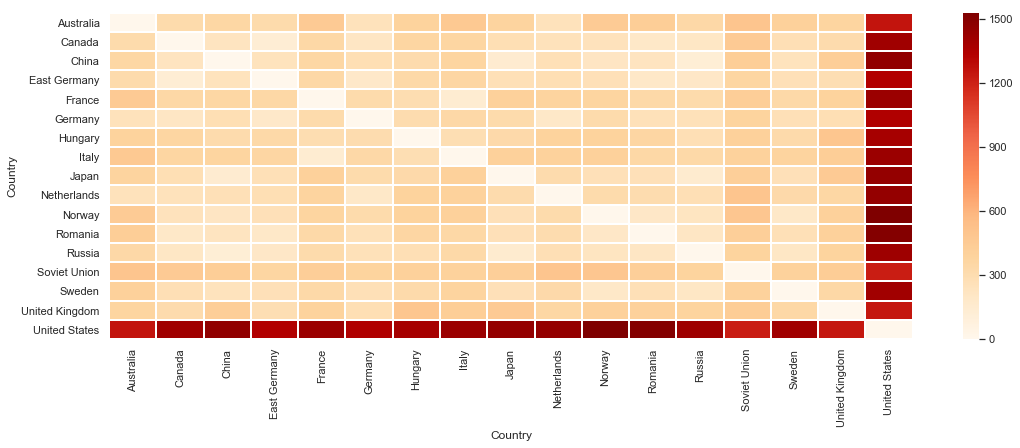

In [64]:
# plot it with seaborn
plt.figure(figsize=(18, 6))
sns.heatmap(
    pairwise_top,
    cmap='OrRd',
    linewidth=1
);

we can see a problem with the distance metric we're using. 

The US has won so many more medals than other countries that it distorts the measurement. 

And if we think about it, what we're really interested in is not the exact number of medals in each category, but the relative number. 

In other words, we want two contries to be considered similar if they both have about twice as many medals in boxing as athletics, for example, regardless of the exact numbers.

#### use cosine distance

In [66]:
# make pairwise distance matrix
pairwise_top = pd.DataFrame(
    squareform(pdist(top_countries, metric='cosine')),
    columns = top_countries.index,
    index   = top_countries.index
)

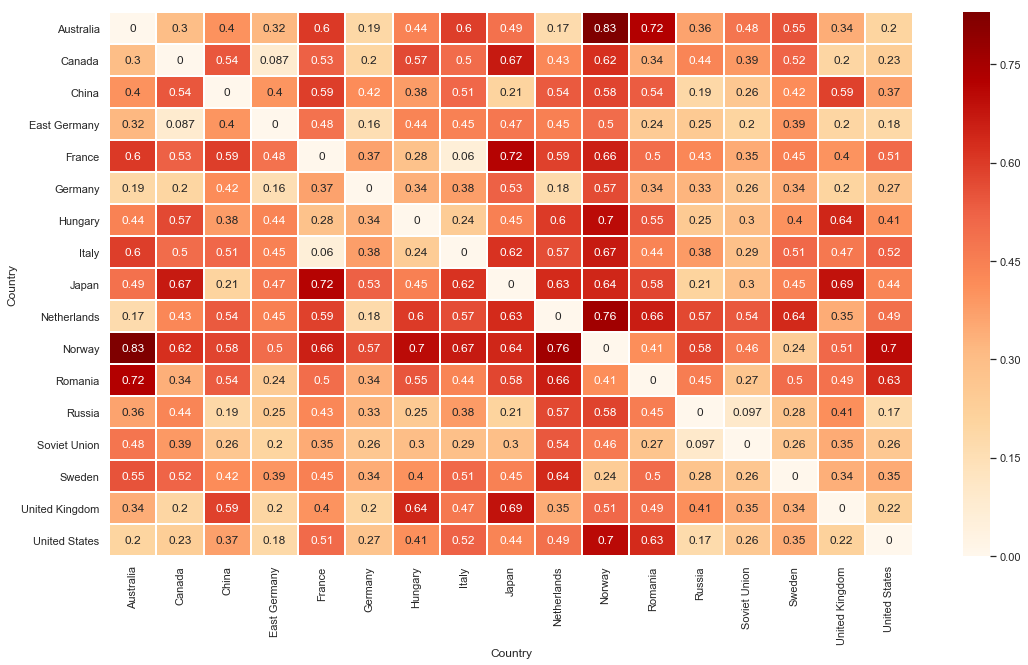

In [70]:
# plot it with seaborn
plt.figure(figsize=(18, 10))
sns.heatmap(
    pairwise_top,
    cmap='OrRd',
    linewidth=1,
    annot=True
);

## Adjusted Cosine

In [71]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

In [5]:
# numpy array that has user_id as row and item_id as column. 
# the entries inside the matrix are ratings the people u has given to item i, based on row u and column i.
M = np.asarray([[2, 3, 4, 1, 0], 
                [0, 0, 0, 0, 5], 
                [5, 4, 3, 0, 0], 
                [1, 1, 1, 1, 1]])
M

array([[2, 3, 4, 1, 0],
       [0, 0, 0, 0, 5],
       [5, 4, 3, 0, 0],
       [1, 1, 1, 1, 1]])

In [78]:
movie_matrix = pd.DataFrame(data=M, columns=['movie1', 'movie2', 'movie3', 'movie4', 'movie5'], index= ['user1', 'user2', 'user3', 'user4'])
movie_matrix

,movie1,movie2,movie3,movie4,movie5
user1,2,3,4,1,0
user2,0,0,0,0,5
user3,5,4,3,0,0
user4,1,1,1,1,1


In [81]:
movie_matrix_T = movie_matrix.T
movie_matrix_T

,user1,user2,user3,user4
movie1,2,0,5,1
movie2,3,0,4,1
movie3,4,0,3,1
movie4,1,0,0,1
movie5,0,5,0,1


In [83]:
pairwise = pd.DataFrame(
    squareform(pdist(movie_matrix_T, metric='cosine')),
    columns = movie_matrix_T.index,
    index   = movie_matrix_T.index
)
pairwise

,movie1,movie2,movie3,movie4,movie5
movie1,0.000000,0.033245,0.140662,0.612702,0.964194
movie2,0.033245,0.000000,0.038462,0.445300,0.961538
movie3,0.140662,0.038462,0.000000,0.306625,0.961538
movie4,0.612702,0.445300,0.306625,0.000000,0.861325
movie5,0.964194,0.961538,0.961538,0.861325,0.000000


In [89]:
M

array([[2, 3, 4, 1, 0],
       [0, 0, 0, 0, 5],
       [5, 4, 3, 0, 0],
       [1, 1, 1, 1, 1]])

In [91]:
M_u = M.mean(axis=1).reshape(-1, 1)
M_u

array([[2. ],
       [1. ],
       [2.4],
       [1. ]])

In [93]:
item_mean_subtracted = M - M_u
item_mean_subtracted

array([[ 0. ,  1. ,  2. , -1. , -2. ],
       [-1. , -1. , -1. , -1. ,  4. ],
       [ 2.6,  1.6,  0.6, -2.4, -2.4],
       [ 0. ,  0. ,  0. ,  0. ,  0. ]])

In [94]:
movie_matrix = pd.DataFrame(data=item_mean_subtracted, columns=['movie1', 'movie2', 'movie3', 'movie4', 'movie5'], index= ['user1', 'user2', 'user3', 'user4'])
movie_matrix

,movie1,movie2,movie3,movie4,movie5
user1,0.0,1.0,2.0,-1.0,-2.0
user2,-1.0,-1.0,-1.0,-1.0,4.0
user3,2.6,1.6,0.6,-2.4,-2.4
user4,0.0,0.0,0.0,0.0,0.0


In [95]:
movie_matrix_T = movie_matrix.T
movie_matrix_T

,user1,user2,user3,user4
movie1,0.0,-1.0,2.6,0.0
movie2,1.0,-1.0,1.6,0.0
movie3,2.0,-1.0,0.6,0.0
movie4,-1.0,-1.0,-2.4,0.0
movie5,-2.0,4.0,-2.4,0.0


In [97]:
pairwise_sim = pd.DataFrame(
                    1- squareform(pdist(movie_matrix_T, metric='cosine')),
                    columns = movie_matrix_T.index,
                    index   = movie_matrix_T.index
)
pairwise_sim

,movie1,movie2,movie3,movie4,movie5
movie1,1.000000,0.867434,0.396942,-0.675258,-0.724263
movie2,0.867434,1.000000,0.800996,-0.645532,-0.907904
movie3,0.396942,0.800996,1.000000,-0.378335,-0.803372
movie4,-0.675258,-0.645532,-0.378335,1.000000,0.265940
movie5,-0.724263,-0.907904,-0.803372,0.265940,1.000000


# Hamming distance

Compute the Hamming distance between two 1-D arrays.

The Hamming distance between 1-D arrays u and v, is simply the proportion of disagreeing components in u and v.

In information theory, the Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. In other words, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the other.

In [3]:
data_dict = {'num_doors':   pd.Series(data= [2, 4, 2, 2]),
             'num_cyl':     pd.Series(data= [2, 3, 4, 8]),
             'cruise_ctrl': pd.Series(data= [0, 0, 1, 1]),
             'price_cat':   pd.Series(data= [1, 2, 2, 4])
            }

In [4]:
df = pd.DataFrame(data_dict)
df

,cruise_ctrl,num_cyl,num_doors,price_cat
0,0,2,2,1
1,0,3,4,2
2,1,4,2,2
3,1,8,2,4


In [10]:
a = df.iloc[1].values
b = df.iloc[2].values

In [11]:
a

array([0, 3, 4, 2], dtype=int64)

In [13]:
distance.hamming(a, b)

0.75

# scipy.spatial.distance.braycurtis - Dissimilarity

For a simple example, consider two aquariums;

Tank one: 6 goldfish, 7 guppies and 4 rainbow fish,
Tank two: 10 goldfish           and 6 rainbow fish.


To calculate Bray-Curtis,
- let’s first calculate Cij (the sum of only the lesser counts for each species found in both sites). 
- Goldfish are found on both sites; the lesser count is 6. 
- Guppies are only on one site, so they can’t be added in here. 
- Rainbow fish, though, are on both, and the lesser count is 4.

So Cij = 6 + 4 = 10.

Si (total number of specimens counted on site i) = 6 + 7 + 4 = 17, and
Sj (total number of specimens counted on site j) = 10 + 6 = 16.

So our BCij = 1 – (2 * 10) / (17 + 16), or 0.39.

** interpretation **

The Bray-Curtis dissimilarity is always a number between 0 and 1. 
- If 0, the two sites share all the same species; 
- if 1, they don’t share any species.

** Assumptions **

To calculate the Bray-Curtis dissimilarity between two sites you must assume that both sites are the same size, either in area or volume (as is relevant to species counts). 

This is because the equation doesn’t include any notion of space; it works only with the counts themselves.

If the two sites are not the same size, you will need to adjust your counts before doing the Bray-Curtis calculation.


[1, 0, 0]
[0, 1, 0]



 $ s = 1 - \frac{|p - q|}{n - 1}$

# Locality Sensitive Hashing 

pip install LocalitySensitiveHashing

A Python implementation of Locality Sensitive Hashing for finding nearest neighbors and clusters in multidimensional numerical data

- Locality Sensitive Hashing (LSH) is a computationally efficient approach for finding nearest neighbors in large datasets. 

- The main idea in LSH is to avoid having to compare every pair of data samples in a large dataset in order to find the nearest similar neighbors for the different data samples. 

- With LSH, one can expect a data sample and its closest similar neighbors to be hashed into the same bucket with a high probability. 

- By treating the data samples placed in the same bucket as candidates for similarity checking, we significantly reduce the computational burden associated with similarity detection in large datasets.

- While LSH algorithms have traditionally been used for finding nearest neighbors, this module goes a step further and explores using LSH for clustering the data. 

- Strictly speaking, this violates the basic mandate of LSH, which is to return just the nearest neighbors. (A data sample X being Y’s nearest neighbor and Y being Z’s nearest neighbor, in the sense neighbors are commonly defined with the Cosine metric in LSH, does not imply that X and Z will always be sufficiently close to be considered each other’s nearest neighbors.) 

- Random hyper-planes $h_1, h_2,...h_k$

- space sliced into $2^k regions (ploytopes) $

- compare x only to training points in the same region

- Complexity : O(kd + dn/$2^k$) = O(d.log(n)) vs O(dn)

- missed neighbors
    - repeat with different $h_1, h_2,...h_k$
